# IAI5101_Assignment1: Patient Show Up Prediction 
Chenyu Wang 300221709

## About this project
Bay clinic is a medical centre in Houston that operates with a unique mission of blending research and education with clinical and hospital care. The medical center has a huge head force of 25,000 employees, and as a result of the combined effort of those employees, the medical center has been able to handle approximately 3 million visits so far. In recent times, the hospital was incurring losses despite having the finest doctors available and not lacking scheduled appointments. To investigate the reason for the anomaly, a sample data dump of appointments medicalcentre.csv is hereby presented. The collected data provides information on the patient’s age, gender, appointment date, various diseases, etc. To cut costs, predict if a patient will show up on the appointment day or not 



## dataset
This dataset includes 14 features and 110527 recoreds. The features are in following:
- PatientId :- Patient ID number 
- AppointmentID :- Appointment ID 
- Gender :- F or M
- ScheduledDay :- Scheduled appointment time
- AppointmentDay :- Appointment Day
- Age :- Patient Age(years)
- Neighbourhood :- Patient Address 
- Scholarship :- 0(have) or 1(doesn't have)
- Hipertension :- 0(No) or 1(yes)
- Diabetes :- 0(have) or 1(doesn't have)
- Alcoholism :- 0(No) or 1(yes)
- Handcap :- 0 to 4
- SMS_received :- 0(recevied) or 1(didn't receive)
- No-show :- yes or no 

# Index
1. Importing Required Libraries

2. Dataset Description 
 - Mounting my google driver 
 - Loading the dataset
 - Understanding the dataset 
 - Conclusion about dataset

3. Data Cleaning
 - Dropping duplicate values
 - Checking NULL values
 - Checking for 0 value
 - Breaking the date features into date components
 - New column AwaitingTime & Cleaning negative time values
 - Encoding the string categorical value

4. Data Visualization
 - Count Plot : to see if the dataset is balanced or not
 - Histograms : to see if data is normally distributed or skewed
 -Box Plot : to analyse the distribution and see the outliers
 - Scatter plots : to understand relationship   between any two variables
 - Pair plot : to create scatter plot between all the variables

5. Feature Selection


6. Split the Data Frame into X and y
 -Fixing imbalance problem

7. Model Building

  7.1 Naive Bayes

  7.2 SVM

  7.3 Decision Tree

  The models include the following:-
  - Hyper Parameter Tuning using GridSearch CV

   - Fit Best Model

  -  Predict on testing data using that model

  - Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score

8. Classification Evaluation via ROC


9. Conclusion

# Import libraries 

In [87]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime,timedelta
import warnings 
warnings.filterwarnings('ignore') # to ignore deprecated functions

# Dataset Description 

## mount my google driver

In [88]:
from google.colab import drive
drive.mount('/content/drive')

## Loading the dataset

In [89]:
#df=pd.read_csv("/content/drive/MyDrive/GNG-5300/MedicalCentre.csv")
df=pd.read_csv("/Users/chenyuwang/Desktop/MedicalCentre.csv")

## Understanding the dataset
Head of the dataset 

Shape of the data set 

Types of columns 

Information about data set 

Summary of the data set 


In [90]:
df.head() #get familier with dataset, display the top 5 data records

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [91]:
df.shape #getting to know about rows and columns we're dealing with - 110527 rows , 14 columns

(110527, 14)

In [92]:
df.columns #learning about the columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [93]:
df.dtypes #knowledge of data type helps for computation

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [94]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [95]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Conclusion about dataset
We observe that value type of Gender, ScheduledDay,AppointmentDay, Neighbourhood, and No-show is object. There are negative values in Age. Hence in the data cleaning process we'll have to covert categorial value to numerical one, and remove negative values in age.

# Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value
- Cleaning the negative Age values
- Break the date features into date components
- Creating new column AwaitingTime & cleaning negative time values
- Encoding the string categorical value

## Dropping duplicate values & Checking NULL values & Checking for 0 value

In [96]:
df=df.drop_duplicates() # check for duplicates & drop

In [97]:
df.isnull().sum() #check for missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [98]:
#checking for 0 values in 2 columns 
print(df[df['PatientId']==0].shape[0])
print(df[df['AppointmentID']==0].shape[0])



0
0


## Cleaning the negative Age feature

In [99]:
#Count the frequency of negative Age feature observations
print(df[df['Age']<0].shape[0])


1


In [100]:
#remove negative Age feature observations
df=df.drop(index=df[df['Age']<0].index)


## Break the date features into date components

In [101]:
#Break the ScheduledDay into date components
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['ScheduledDay']


0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110526, dtype: datetime64[ns, UTC]

In [102]:
#Break the AppointmentDay into date components
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110526, dtype: datetime64[ns, UTC]

## New column AwaitingTime & Cleaning negative time values

In [103]:
#Add a new feature AwaitingTime by AppointmentDay - ScheduledDay
df['AwaitingTime']=df['AppointmentDay']-df['ScheduledDay']
df['AwaitingTime']=df['AwaitingTime'].map(lambda x: x.days)
df['AwaitingTime']

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: AwaitingTime, Length: 110526, dtype: int64

In [104]:
#Count the values within AwaitingTime are negative
print(df[df['AwaitingTime']<0].shape[0])

38567


In [105]:
#transform them into positive values
df['AwaitingTime'] = df['AwaitingTime'].abs()
print(df[df['AwaitingTime']<0].shape[0])

0


## Encode the string categorical value

In [106]:
#Encode the string categorical value
#LABEL ENCODING
# import packages
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()
  
df['Gender']= le.fit_transform(df['Gender'])
df['No-show']= le.fit_transform(df['No-show'])
df['Neighbourhood']= le.fit_transform(df['Neighbourhood'])

df[['Gender','No-show','Neighbourhood']].head()

,Gender,No-show,Neighbourhood
0,0,0,39
1,1,0,39
2,0,0,45
3,0,0,54
4,0,0,39


# Data Visualization

- Count Plot :- to see if the dataset is balanced or not
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers
- Scatter plots :- to understand relationship between any two variables
- Pair plot :- to create scatter plot between all the variables

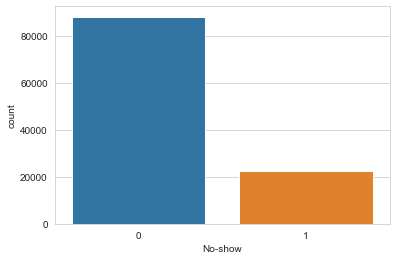

In [107]:
#Count Plot :- to see if the dataset is balanced or not
sns.countplot('No-show',data=df)

Conclusion :- I observe that number of patients  who show up is far more than patients who do not which indicates that our data is imbalanced. I fix the imbalance problem in the Split data frame into X and y section.

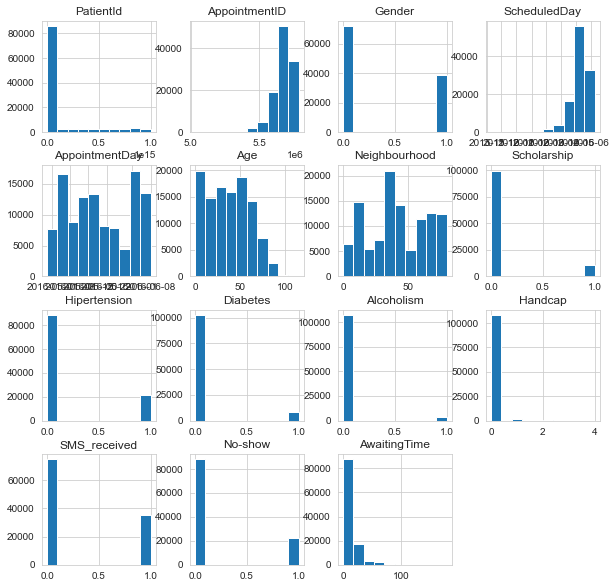

In [108]:
#to see if data is normally distributed or skewed
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

Conclusion :- I observe that None is normally distributed rest. 

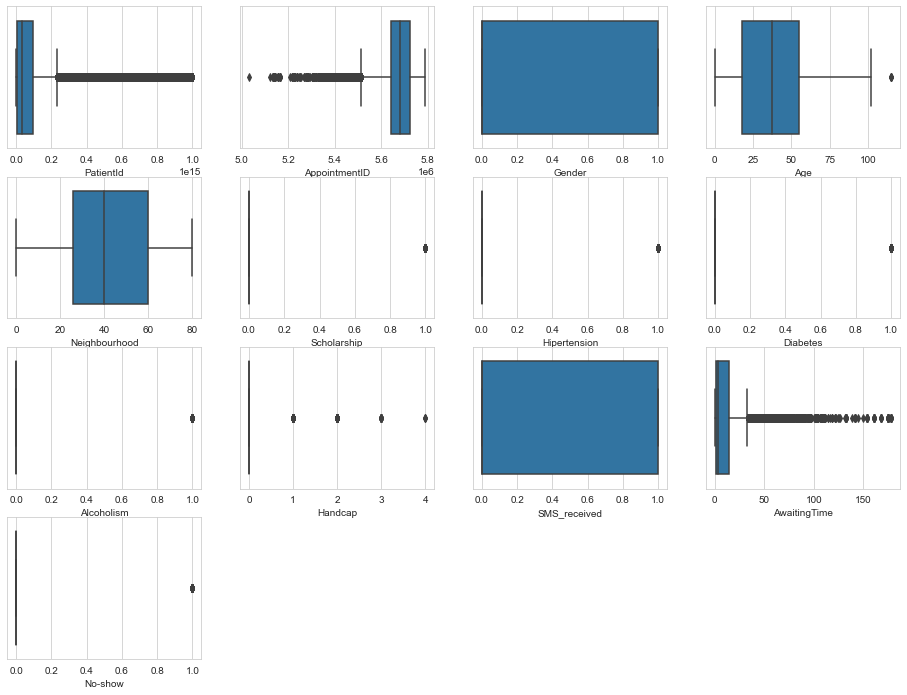

In [109]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(4,4,1)
sns.boxplot(x='PatientId',data=df)
plt.subplot(4,4,2)
sns.boxplot(x='AppointmentID',data=df)
plt.subplot(4,4,3)
sns.boxplot(x='Gender',data=df)
plt.subplot(4,4,4)
sns.boxplot(x='Age',data=df)
plt.subplot(4,4,5)
sns.boxplot(x='Neighbourhood',data=df)
plt.subplot(4,4,6)
sns.boxplot(x='Scholarship',data=df)
plt.subplot(4,4,7)
sns.boxplot(x='Hipertension',data=df)
plt.subplot(4,4,8)
sns.boxplot(x='Diabetes',data=df)
plt.subplot(4,4,9)
sns.boxplot(x='Alcoholism',data=df)
plt.subplot(4,4,10)
sns.boxplot(x='Handcap',data=df)
plt.subplot(4,4,11)
sns.boxplot(x='SMS_received',data=df)
plt.subplot(4,4,12)
sns.boxplot(x='AwaitingTime',data=df)
plt.subplot(4,4,13)
sns.boxplot(x='No-show',data=df)


Conclusion:- I observed that patientId, appointmentID, Age, and AwaitingTime have Outliers.

Outliers are unusual values in the dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.


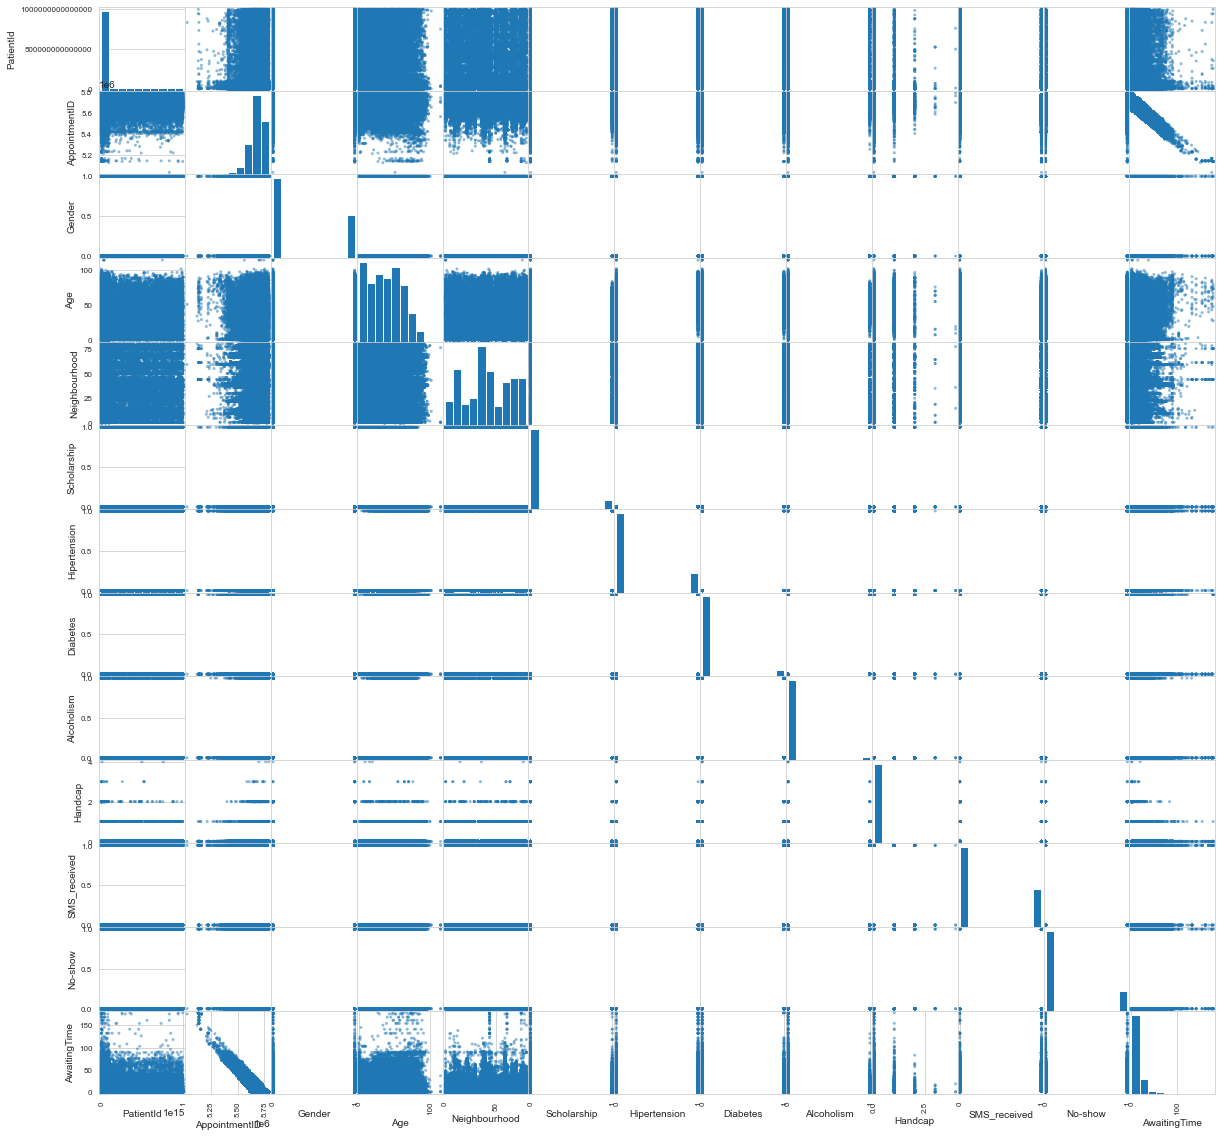

In [110]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots 

# Feature Selection

Pearson's Correlation Coefficient : Helps find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

Following are the septs:
- switching the site of No-show and AwaitingTime
- Drawing heat map
- Selecting relevant features
- Rescale the features with a normalizing


In [111]:
#switch the site of No-show and AwaitingTime
df_id=df['No-show']
df = df.drop('No-show',axis=1)
df['No-show']=df_id

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AwaitingTime,No-show
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,39,0,1,0,0,0,0,1,0
1,5.589980e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,39,0,0,0,0,0,0,1,0
2,4.262960e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,45,0,0,0,0,0,0,1,0
3,8.679510e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,54,0,0,0,0,0,0,1,0
4,8.841190e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,39,0,1,1,0,0,0,1,0


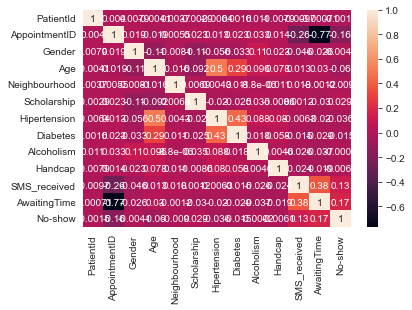

In [112]:
#heat map
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [113]:
upper_tri = corrmat.where(np.triu(np.ones(corrmat.shape), k =1).astype(np.bool))
print(upper_tri)

               PatientId  AppointmentID    Gender       Age  Neighbourhood  \
PatientId            NaN       0.004023  0.007898 -0.004121       0.003745   
AppointmentID        NaN            NaN  0.018506 -0.019106       0.005500   
Gender               NaN            NaN       NaN -0.106452      -0.008053   
Age                  NaN            NaN       NaN       NaN      -0.016346   
Neighbourhood        NaN            NaN       NaN       NaN            NaN   
Scholarship          NaN            NaN       NaN       NaN            NaN   
Hipertension         NaN            NaN       NaN       NaN            NaN   
Diabetes             NaN            NaN       NaN       NaN            NaN   
Alcoholism           NaN            NaN       NaN       NaN            NaN   
Handcap              NaN            NaN       NaN       NaN            NaN   
SMS_received         NaN            NaN       NaN       NaN            NaN   
AwaitingTime         NaN            NaN       NaN       NaN     

In [114]:
#drop irrelevant features
new_df = df.drop(['PatientId', 'Gender', 'Neighbourhood', 'Alcoholism','Handcap','ScheduledDay','AppointmentDay','AppointmentID','Diabetes'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           110526 non-null  int64
 1   Scholarship   110526 non-null  int64
 2   Hipertension  110526 non-null  int64
 3   SMS_received  110526 non-null  int64
 4   AwaitingTime  110526 non-null  int64
 5   No-show       110526 non-null  int64
dtypes: int64(6)
memory usage: 5.9 MB


CONCLUSION :- Observed the last row 'No-show' and note its correlation scores with different features. 

We can observe that all correlation scores of 'No-show' and other features are very low. It is hard to select features.

Finally, I drop 'PatientId',  'Gender', 'Neighbourhood', 'Alcoholism','Handcap','ScheduledDay','AppointmentDay', 'AppointmentID', and 'Diabetes', since their correlation scores are low. Moreover, Based on real life, 'PatientId' and 'AppointmentID' are irrelevant with show up. Thus, these features don't contribute much to the model.

In [115]:

#MIN-MAX SCALER
from sklearn.preprocessing import MinMaxScaler

X=new_df
# create scaler method
scaler = MinMaxScaler(feature_range=(0,1))

# fit and transform the data
scaled_data = scaler.fit_transform(X)
df_new=scaler.transform(X)

df_new=pd.DataFrame(scaled_data)
df_new.columns =['Age','Scholarship','Hipertension','SMS_received','AwaitingTime','No-show']
df_new.head()

,Age,Scholarship,Hipertension,SMS_received,AwaitingTime,No-show
0,0.539130,0.0,1.0,0.0,0.005618,0.0
1,0.486957,0.0,0.0,0.0,0.005618,0.0
2,0.539130,0.0,0.0,0.0,0.005618,0.0
3,0.069565,0.0,0.0,0.0,0.005618,0.0
4,0.486957,0.0,1.0,0.0,0.005618,0.0


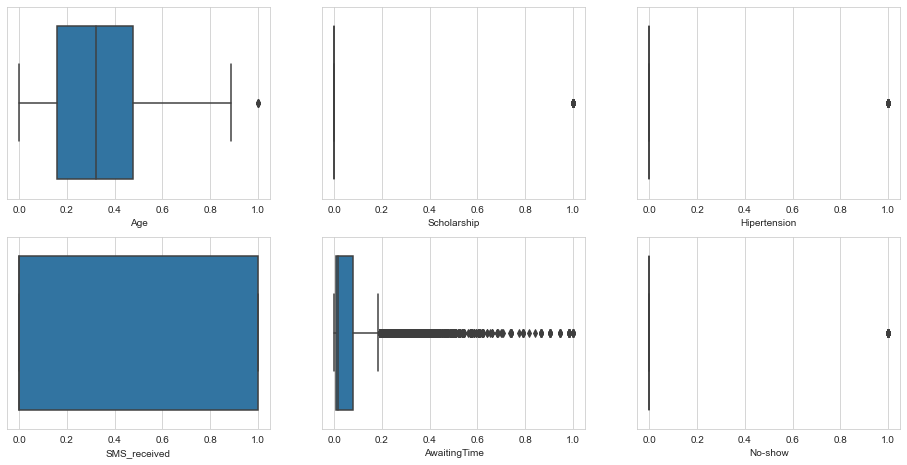

In [116]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['Scholarship'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Hipertension'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['SMS_received'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['AwaitingTime'],data=df_new)
plt.subplot(3,3,6)
sns.boxplot(x=df_new['No-show'],data=df_new)

Conclusion: After using MIN-MAX SCALER to scaled values to a narrow range around zero, we can observe that outliers still exist in Age, AwaitingTime, and AppointmentID. So, I change to use Quantile Transformer.

Quantile Transformer transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme. 

In [117]:
from sklearn.preprocessing import QuantileTransformer
x=new_df
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Age','Scholarship','Hipertension','SMS_received','AwaitingTime','No-show']
df_new.head()

,Age,Scholarship,Hipertension,SMS_received,AwaitingTime,No-show
0,0.839840,0.0,1.0,0.0,0.251752,0.0
1,0.758759,0.0,0.0,0.0,0.251752,0.0
2,0.839840,0.0,0.0,0.0,0.251752,0.0
3,0.139139,0.0,0.0,0.0,0.251752,0.0
4,0.758759,0.0,1.0,0.0,0.251752,0.0


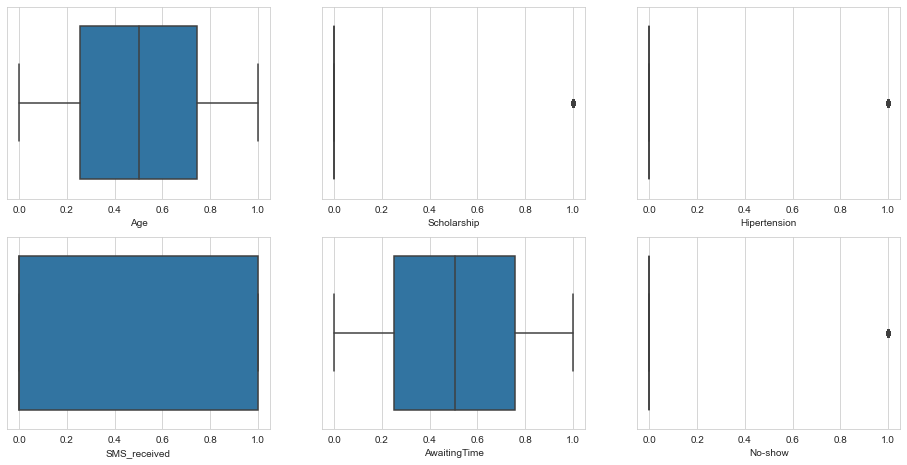

In [118]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['Scholarship'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Hipertension'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['SMS_received'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['AwaitingTime'],data=df_new)
plt.subplot(3,3,6)
sns.boxplot(x=df_new['No-show'],data=df_new)



Conclusion: there is no Outlier.

# Split the Data Frame into X and y

In [119]:
target_name='No-show'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the No-show column and keeping all other columns as X

In [120]:
X.head() # contains only independent features 

,Age,Scholarship,Hipertension,SMS_received,AwaitingTime
0,0.839840,0.0,1.0,0.0,0.251752
1,0.758759,0.0,0.0,0.0,0.251752
2,0.839840,0.0,0.0,0.0,0.251752
3,0.139139,0.0,0.0,0.0,0.251752
4,0.758759,0.0,1.0,0.0,0.251752


In [121]:
y.head() #contains dependent feature

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: No-show, dtype: float64

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- Train Dataset: Used to fit the machine learning model.

- Test Dataset: Used to evaluate the fit machine learning model.

- I've used 70% train and 30% test

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)#splitting data in 70% train, 30%test
X_train.shape,y_train.shape

((77368, 5), (77368,))

In [123]:
X_test.shape,y_test.shape

((33158, 5), (33158,))

## Fixing imbalance problem
The synthetic prime sampling technique (SMOTE) is a prevalent generates synthetic samples from the minority class. It is an excellent way to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier 

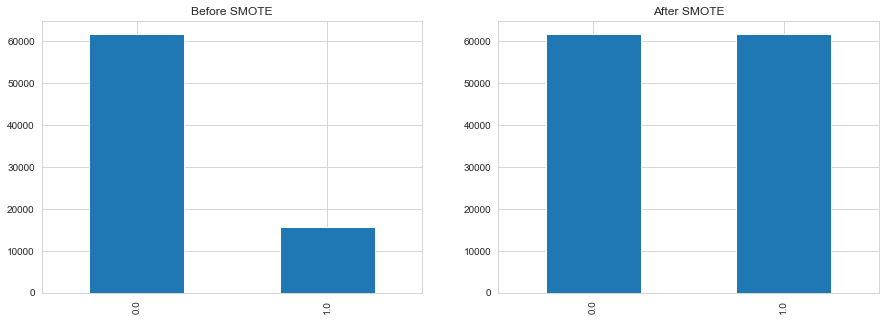

In [124]:
from imblearn.over_sampling import SMOTE # SMOTE
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()


In [125]:
X_train_new.shape,y_train_new.shape

((123284, 5), (123284,))

# Model Building
- Naïve Bayes
- SVM
- Decision Tree


## The models include the following:
1. Hyper Parameter Tuning using GridSearch CV
- Hyperparameter Tuning

 Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Decision Tree Algorithms, kernel in SVM. Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models.

- GridSearch

  Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

- Steps To Follow For Hyper Parameter Tuning

  - Select the type of model we want to use like svc, GaussianNB or any other model
  - Check what are the parameters of the model
  - Select the methods for searching the hyperparameter
  - Select the cross-validation approach
  - Evaluate the model using the score

2. Fit Best Model
3. Predict on testing data using that model
4. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score 
- Confusion Matrix It is a tabular visualization of the model predictions versus the ground-truth labels.
- Accuracy: The accuracy of a test is its ability to differentiate show up and not show up cases correctly.

- F1 Score :- It’s the harmonic mean between precision and recall.

- Precision Score Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

- Recall Score It is the fraction of positives/negative events that you predicted correctly.

- Sensitivity (True Positive Rate) refers to the probability of a positive test, conditioned on truly having the condition.

- Specificity (True Negative Rate) refers to the probability of a negative test, provided one does not have the condition.

5. In this case, Accuracy, Sensitivity, and Specificity were used together to evaluate the preformance of three models.

## Naïve Bayes 
Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [126]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [127]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [128]:
nbModel_grid.fit(X_train_new, y_train_new)
best_model_nb = nbModel_grid.best_estimator_
best_model_nb

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GaussianNB(var_smoothing=0.25950242113997357)

In [129]:
nb_pred=best_model_nb.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.87      0.64      0.74     26565
         1.0       0.30      0.63      0.41      6593

    accuracy                           0.63     33158
   macro avg       0.59      0.63      0.57     33158
weighted avg       0.76      0.63      0.67     33158

Training accuracy: 0.6410483618365166
Accuracy: 0.634597985403221
Sensitivity: 0.6293038070681025
Specificity: 0.6359119141727837

 Confusion Matrix:



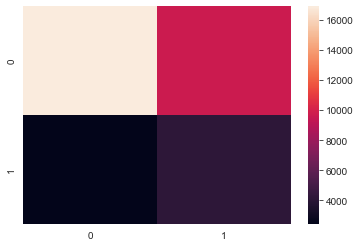

In [130]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))

print("Training accuracy: {}".format(nbModel_grid.best_score_))
confusion = confusion_matrix(y_test,nb_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN))
print('Sensitivity:',TP / float(TP+FN))
print('Specificity:',TN / float(TN+FP)) 


print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

The accuracy in training set(0.64) is close to the accuracy in test set(0.63), since it's not overfitting.

## Support Vector Machine
svm is typically leveraged for classification problems, constructing a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., show up vs don't show up ) on either side of the plane.

In this case, the dataset is large and the time cost of SVM is very high. So, in the tune of svm, I just try few parameters. For example, the parameter "C" of SVM, I used 1 and 0.1. Instead of RepeatedStratifiedKFold and StratifiedKFold, I choosed 5 Fold cross vaildation.

In [131]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [132]:
model = SVC(probability=True)
kernel = ['sigmoid']
C = [1,0.1]
gamma = ['scale']

In [133]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#cv = StratifiedKFold(n_splits=5)
grid_search_svm = GridSearchCV(estimator=model, param_grid=grid,cv=5, n_jobs=-1,error_score=0)

In [134]:
grid_search_svm.fit(X_train_new, y_train_new)
best_model_svm=grid_search_svm.best_estimator_
best_model_svm

SVC(C=1, kernel='sigmoid', probability=True)

In [135]:
svm_pred=best_model_svm.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.55      0.66     26565
         1.0       0.24      0.56      0.33      6593

    accuracy                           0.55     33158
   macro avg       0.53      0.55      0.50     33158
weighted avg       0.71      0.55      0.60     33158

Training accuracy: 0.5576636452123129
Accuracy: 0.5519633271005489
Sensitivity: 0.5574093735780373
Specificity: 0.5506117071334463

 Confusion Matrix:



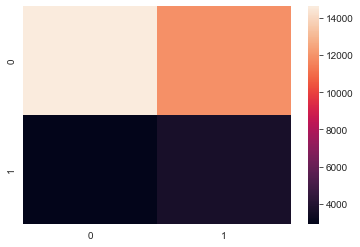

In [136]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))

print("Training accuracy: {}".format(grid_search_svm.best_score_))
confusion = confusion_matrix(y_test,svm_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN))
print('Sensitivity:',TP / float(TP+FN))
print('Specificity:',TN / float(TN+FP)) 

print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

The accuracy in training set(0.55) is same with the accuracy in test set(0.55), since it's not overfitting.

## Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [138]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [139]:
grid_search_dt = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [140]:
grid_search_dt.fit(X_train_new, y_train_new)
best_model_dt = grid_search_dt.best_estimator_
best_model_dt

Fitting 4 folds for each of 40 candidates, totalling 160 fits


DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=10,
                       random_state=42)

In [141]:
dt_pred=best_model_dt.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.73      0.79     26565
         1.0       0.32      0.50      0.39      6593

    accuracy                           0.68     33158
   macro avg       0.59      0.62      0.59     33158
weighted avg       0.75      0.68      0.71     33158

Training accuracy: 0.7132231270886734
Accuracy: 0.684902587610833
Sensitivity: 0.5020476262702867
Specificity: 0.7302842085450781

 Confusion Matrix:



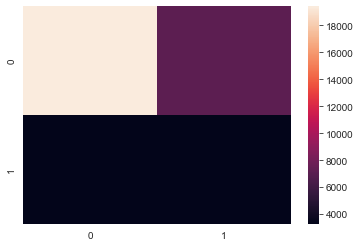

In [142]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))

print("Training accuracy: {}".format(grid_search_dt.best_score_))
confusion = confusion_matrix(y_test,dt_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN))
print('Sensitivity:',TP / float(TP+FN))
print('Specificity:',TN / float(TN+FP)) 
 
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

The accuracy in training set(0.71) is close to the accuracy in test set(0.68), since it's not overfitting.

# Classification Evaluation via ROC
1. ROC analysis is a useful tool for evaluating the performance of diagnostic tests and more generally for evaluating the accuracy of a statistical model.

2. An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

 - True Positive Rate
 - False Positive Rate

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [best_model_nb,
               best_model_svm,
               best_model_dt
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,fpr,tpr,auc
classifiers,,,
GaussianNB,"[0.0, 0.0, 0.00015057406361754187, 0.000150574...","[0.0, 0.00015167602002123465, 0.00015167602002...",0.651759
SVC,"[0.0, 0.0, 0.00015057406361754187, 0.000150574...","[0.0, 0.00015167602002123465, 0.00015167602002...",0.577959
DecisionTreeClassifier,"[0.0, 0.00240918501788067, 0.00248447204968944...","[0.0, 0.005763688760806916, 0.0059153647808281...",0.645726


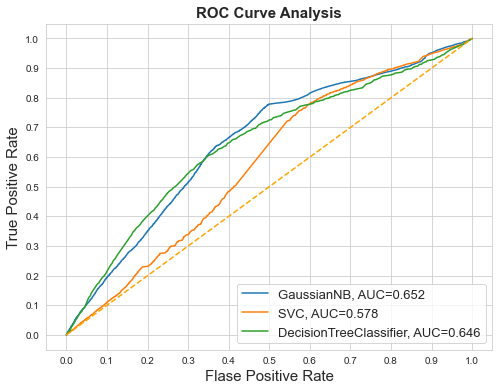

In [144]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Conclusion 
1. k folds cross-validation technique was used in three model building. This technique avoid the overfitting problem.

2. The SVM has the hightes time cost. It doesn't fit this classification project.

3. According to the confusion matrix, the Accuracy of Decision tree is 0.68 that is the highest in three models. Moreover, the Sensitivity of Naive Bayes is 0.63 that is the highest in three models. Finally, the Specificity of Decision tree is 0.73 that is the highest in three models.In the conclusion, the performance of decision tree is better than performance of Naive Bayes and SVM, since the accuracy and Specificity of Decision tree are the highest. Moreover, the performance of SVM is the worst, because Accuracy, Sensitivity, and Specificity of SVM are the lowest in three models.

4. ROC curve for the Naive Bayes is higher than that for the SVM and decision tree. Therefore, we can say that Naive Bayes did better classifying the positive class in the dataset.

